In [1]:
import numpy as np
from time import time, sleep
import qcodes as qc
import matplotlib.pyplot as plt
from tqdm import tqdm

## Multidimensional scanning module
from qcodes.dataset import (
    LinSweep,
    Measurement,
    dond,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
    plot_dataset,
)


## Using interactive widget
from qcodes.interactive_widget import experiments_widget
## import instrument
from qcodes.instrument_drivers.rohde_schwarz import (
    RohdeSchwarzZVA24,
    RohdeSchwarzZNBChannel,
    RohdeSchwarzSGS100A,
)
from qcodes.instrument_drivers.yokogawa import YokogawaGS200

# qc.logger.start_all_logging()

<frozen abc>:106: QCoDeSDeprecationWarning: The ZNB base class has been renamed RohdeSchwarzZNBBase


In [2]:
## A station is a collection of all the instruments and devices present in your experiment. 
## Same as Labber instrument serer
station = qc.Station()
vna = RohdeSchwarzZVA24("VNA", "TCPIP0::192.168.10.56::inst0::INSTR")
sgsa = RohdeSchwarzSGS100A("SGSA100", "TCPIP0::192.168.10.44::inst0::INSTR")


station.add_component(sgsa)
station.add_component(vna)


Connected to: Rohde&Schwarz ZVA24-4Port (serial:1145111026100311, firmware:3.01) in 2.60s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114213, firmware:4.2.76.0-4.30.046.295) in 0.03s


'VNA'

In [3]:
station.components

{'SGSA100': <RohdeSchwarzSGS100A: SGSA100>, 'VNA': <RohdeSchwarzZVA24: VNA>}

# Statement check code (can delete)

In [4]:
# now make some silly set-up and tear-down actions
def veryfirst():
    print("Starting the measurement")

def numbertwo(inst1, inst2):
    print(f"Doing stuff with the following two instruments: {inst1}, {inst2}")

def thelast():
    print("End of experiment")

# Data file save path

In [5]:
import os
path = os.getcwd()
# the qcodes data file locatoin
initialise_or_create_database_at(path + "\\VNAsweep.db")
qc.config.core.db_location

'C:\\Users\\cluster\\Desktop\\Jay\\Qcode\\VNAsweep.db'

In [6]:
# import IPython.lib.backgroundjobs as bg
# from plottr.apps import inspectr

# jobs = bg.BackgroundJobManager()
# jobs.new(inspectr.main, qc.config.core.db_location)

In [7]:
vnasweep = load_or_create_experiment(
    experiment_name="mollow triplet", sample_name="test sample one"
)

In [8]:
## VAN parameter setting
vna.channels.S21.start(4.505e9)
vna.channels.S21.stop(4.525e9)
vna.channels.S21.npts(101)
vna.channels.S21.power(-15)
vna.channels.S21.avg(30)
vna.channels.S21.bandwidth(1000)
vna.channels.S21.averaging_enabled(True)
vna.channels.S21.auto_sweep_time_enabled(True)
vna.timeout(10)

In [9]:
experiments()

[mollow triplet#test sample one#1@C:\Users\cluster\Desktop\Jay\Qcode\VNAsweep.db
 -------------------------------------------------------------------------------
 1-results-1-VNA_S21_S21_frequency,VNA_S21_trace-1
 2-vna pdr sweep-2-VNA_S21_power,VNA_S21_S21_frequency,VNA_S21_trace-0
 3-vna pdr sweep-3-VNA_S21_power,VNA_S21_S21_frequency,VNA_S21_trace-0
 4-yoko sweep-4-gs200_current,VNA_S21_S21_frequency,VNA_S21_trace-0
 5-yoko sweep-5-gs200_current,VNA_S21_S21_frequency,VNA_S21_trace-31
 6-results-6-VNA_S21_S21_frequency,VNA_S21_trace-1
 7-results-7-VNA_S21_S21_frequency,VNA_S21_trace-1
 8-results-8-VNA_S21_S21_frequency,VNA_S21_trace-1
 9-yoko sweep-9-gs200_current,VNA_S21_S21_frequency,VNA_S21_trace-4
 10-yoko sweep-10-gs200_current,VNA_S21_S21_frequency,VNA_S21_trace-31
 11-vna pdr sweep-11-VNA_S21_power,VNA_S21_S21_frequency,VNA_S21_trace-0
 12-vna pdr sweep-12-VNA_S21_power,VNA_S21_S21_frequency,VNA_S21_trace-4
 13-vna pdr sweep-13-VNA_S21_power,VNA_S21_S21_frequency,VNA_S21_trace

# 1D Freq Sweep

In [32]:
## VAN parameter setting
vna.channels.S21.start(4.505e9)
vna.channels.S21.stop(4.525e9)
vna.channels.S21.npts(101)
vna.channels.S21.power(-12)
vna.channels.S21.avg(50)
vna.channels.S21.bandwidth(1000)
vna.channels.S21.averaging_enabled(True)
vna.channels.S21.auto_sweep_time_enabled(True)
vna.timeout(10)

In [33]:
from time import time, sleep
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels.S21.trace)

start = time()
with meas.run() as datasaver:
    get_v = vna.channels.S21.trace.get()
    datasaver.add_result((vna.channels.S21.trace, get_v))
stop = time()
print('const time=', stop-start)

Starting experimental run with id: 27. 
const time= 35.887601375579834


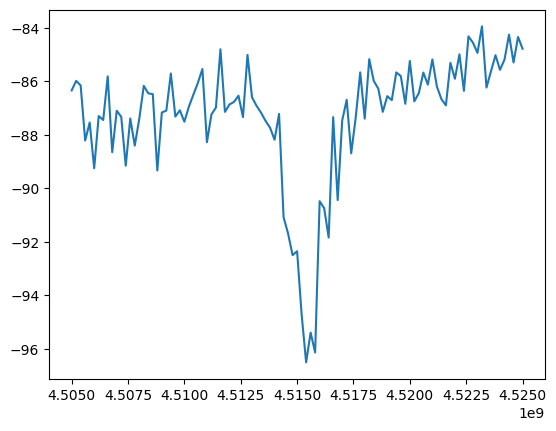

In [34]:
f = datasaver.dataset.get_parameter_data()
y = f['VNA_S21_trace']['VNA_S21_trace'][0]
x = f['VNA_S21_trace']['VNA_S21_S21_frequency'][0]
plt.plot(x, y)

# Yokogawa sweep

In [10]:
yoko = YokogawaGS200("gs200", address="USB::0x0B21::0x0039::91S522309::INSTR", terminator="\n")
station.add_component(yoko)


Connected to: YOKOGAWA GS210 (serial:91S522309, firmware:2.02) in 0.02s


[gs200_program(YokogawaGS200Program)] Snapshot: Could not update parameter: trigger


'gs200'

In [11]:
# yoko = YokogawaGS200("gs200", address="USB::0x0B21::0x0039::91S522309::INSTR", terminator="\n")
# station.add_component(yoko)

# setting the yoko mode and limitation
# yoko.source_mode("CURR")
yoko.current_limit(10e-3)
yoko.source_mode()

'CURR'

In [12]:
yoko.ramp_current(-70e-6,  5e-6, 0.01)

In [13]:
vna.channels.S21.start(4.1e9)
vna.channels.S21.stop(4.6e9)
vna.channels.S21.npts(501)
vna.channels.S21.power(-15)

In [14]:
## measurement scrip setting
meas = Measurement(exp=vnasweep, name="yoko sweep")
meas.register_parameter(yoko.current)  # register the first independent parameter
meas.register_parameter(vna.channels.S21.trace, setpoints=(yoko.current,)) 
meas.add_before_run(veryfirst, ())  # add a set-up action
meas.add_before_run(numbertwo, (vna, yoko))  # add another set-up action
meas.add_after_run(thelast, ())  # add a tear-down action
meas.write_period = 1

Starting the measurement
Doing stuff with the following two instruments: <RohdeSchwarzZVA24: VNA>, <YokogawaGS200: gs200>
Starting experimental run with id: 10. 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [17:03<00:00, 33.01s/it]

End of experiment


([<Axes: title={'center': 'Run #10, Experiment mollow triplet (test sample one)'}, xlabel='Current ($10^{-6}$ I)', ylabel='S21 frequency (GHz)'>],
 [<matplotlib.colorbar.Colorbar at 0x1691974f8c0>])

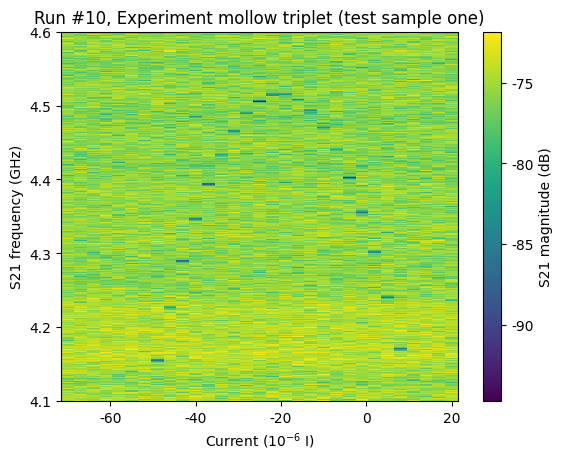

In [15]:
vna.rf_on()
yoko.output("on")

start_curr = -70e-6
stop_curr = 20e-6
sweep_rate = 5e-6

with meas.run() as datasaver:
    for set_v in tqdm(np.linspace(start_curr, stop_curr, 31)):
        yoko.ramp_current(set_v, sweep_rate, 0.01)
        get_v = vna.channels.S21.trace.get()
        datasaver.add_result((yoko.current, set_v), (vna.channels.S21.trace, get_v))
    dataset2D = datasaver.dataset  # convenient to have for data access and plotting
# vna.rf_off()

plot_dataset(dataset2D)

# Power dependent

In [14]:
# yoko.ramp_current(-21e-6,  5e-6, 0.01)
vna.channels.S21.start(4.505e9)
vna.channels.S21.stop(4.525e9)
vna.channels.S21.npts(501)


In [15]:
## measurement scrip setting
meas = Measurement(exp=vnasweep, name="vna pdr sweep")
meas.register_parameter(vna.channels.S21.power)  # register the first independent parameter
meas.register_parameter(vna.channels.S21.trace, setpoints=(vna.channels.S21.power,)) 
meas.add_before_run(veryfirst, ())  # add a set-up action
meas.add_before_run(numbertwo, (vna, vna))  # add another set-up action
meas.add_after_run(thelast, ())  # add a tear-down action
meas.write_period = 1

Starting the measurement
Doing stuff with the following two instruments: <RohdeSchwarzZVA24: VNA>, <RohdeSchwarzZVA24: VNA>
Starting experimental run with id: 22. 


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:34<00:00, 54.93s/it]

End of experiment


([<Axes: title={'center': 'Run #22, Experiment mollow triplet (test sample one)'}, xlabel='Power (dBm)', ylabel='S21 frequency (GHz)'>],
 [<matplotlib.colorbar.Colorbar at 0x2b9549341a0>])

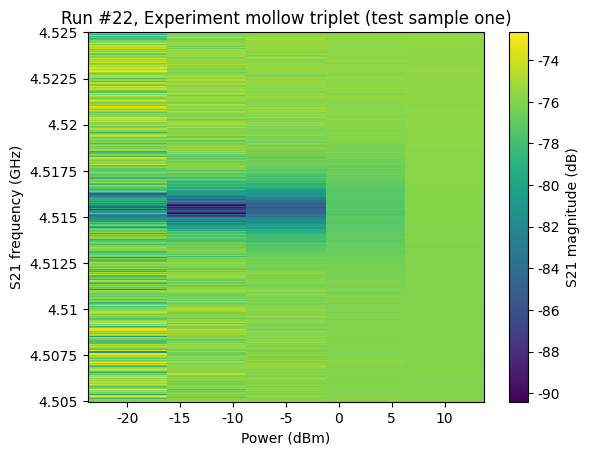

In [16]:
vna.rf_on()
vna.channels.S21.avg( )
with meas.run() as datasaver:
    for set_v in tqdm(np.linspace(-20, 10, 5)):
        vna.channels.S21.avg(50)
        vna.channels.S21.power(set_v)
        get_v = vna.channels.S21.trace.get()
        datasaver.add_result((vna.channels.S21.power, set_v), (vna.channels.S21.trace, get_v))
    dataset2D = datasaver.dataset  # convenient to have for data access and plotting
vna.rf_on()

plot_dataset(dataset2D)

# RF source sweep frequency

In [19]:
## measurement scrip setting
meas = Measurement(exp=vnasweep, name="rf sweep")
meas.register_parameter(sgsa.frequency)  # register the first independent parameter
meas.register_parameter(vna.channels.S21.trace, setpoints=(sgsa.frequency,)) 
meas.add_before_run(veryfirst, ())  # add a set-up action
meas.add_before_run(numbertwo, (vna, sgsa))  # add another set-up action
meas.add_after_run(thelast, ())  # add a tear-down action
meas.write_period = 1

In [20]:
vna.channels.S21.start(4.2e9)
vna.channels.S21.stop(4.55e9)
vna.channels.S21.npts(351)
vna.channels.S21.power(-15)
vna.channels.S21.avg(30)

sgsa.frequency(4.51549e9)
sgsa.power(-20)

In [21]:
import tqdm

vna.rf_on()
vna.channels.S21.power(-30)
sgsa.status(True)
sgsa.power(-20)
with meas.run() as datasaver:
    for set_v in tqm(np.linspace(1e9, 2e9, 11)):
        sgsa.frequency(set_v)
        get_v = vna.channels.S21.trace.get()
        datasaver.add_result((sgsa.frequency, set_v), (vna.channels.S21.trace, get_v))
    dataset2D = datasaver.dataset  # convenient to have for data access and plotting
sgsa.status(False)

plot_dataset(dataset2D)

Starting the measurement
Doing stuff with the following two instruments: <RohdeSchwarzZVA24: VNA>, <RohdeSchwarzSGS100A: SGSA100>
Starting experimental run with id: 23. 


  0%|                                                                                           | 0/11 [00:28<?, ?it/s]
An exception occurred in measurement with guid: 63c9f680-0000-0000-0000-019300b34146;
Traceback:
Traceback (most recent call last):
  File "c:\Users\cluster\anaconda3\envs\qcode\Lib\site-packages\qcodes\dataset\measurements.py", line 268, in _unpack_partial_result
    parameter = self._interdeps._id_to_paramspec[str_or_register_name(param)]
                ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyError: 'SGSA100_power'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\cluster\AppData\Local\Temp\ipykernel_30480\3888537863.py", line 9, in <module>
    datasaver.add_result((sgsa.power, set_v), (vna.channels.S21.trace, get_v), )
    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\cluster\anaconda3\envs\qcode\Lib\site-packages\qcodes

End of experiment


ValueError: Can not add result for parameter SGSA100_power, no such parameter registered with this measurement.

# RF power sweep

In [22]:
## measurement scrip setting
meas = Measurement(exp=vnasweep, name="rf sweep")
meas.register_parameter(sgsa.power)  # register the first independent parameter
meas.register_parameter(vna.channels.S21.trace, setpoints=(sgsa.power,)) 
meas.add_before_run(veryfirst, ())  # add a set-up action
meas.add_before_run(numbertwo, (vna, sgsa))  # add another set-up action
meas.add_after_run(thelast, ())  # add a tear-down action
meas.write_period = 5

In [24]:
vna.channels.S21.start(4.2e9)
vna.channels.S21.stop(4.55e9)
vna.channels.S21.npts(351)
vna.channels.S21.power(-15)
vna.channels.S21.avg(30)

sgsa.frequency(4.51549e9)
sgsa.power(-20)

Starting the measurement
Doing stuff with the following two instruments: <RohdeSchwarzZVA24: VNA>, <RohdeSchwarzSGS100A: SGSA100>
Starting experimental run with id: 24. 


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:16<00:00, 28.80s/it]

End of experiment


([<Axes: title={'center': 'Run #24, Experiment mollow triplet (test sample one)'}, xlabel='Power (dBm)', ylabel='S21 frequency (GHz)'>],
 [<matplotlib.colorbar.Colorbar at 0x2b955cf2c10>])

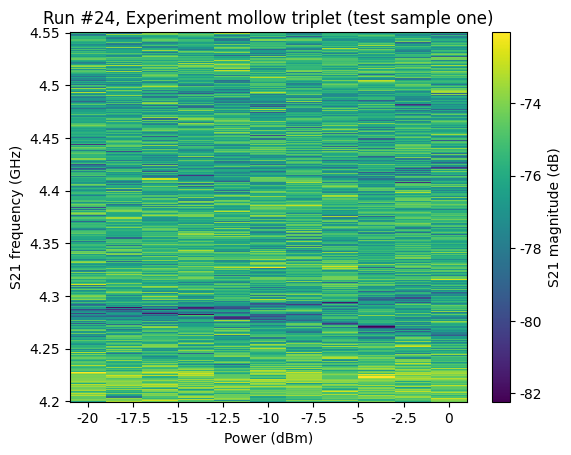

In [25]:
vna.rf_on()
sgsa.status(True)

with meas.run() as datasaver:
    for set_v in tqdm(np.linspace(-20, 0, 11)):
        sgsa.power(set_v)
        get_v = vna.channels.S21.trace.get()
        datasaver.add_result((sgsa.power, set_v), (vna.channels.S21.trace, get_v))
    dataset2D = datasaver.dataset
sgsa.status(False)

plot_dataset(dataset2D)